In [2]:
import pandas as pd
import numpy as np

from scipy.linalg import eigh, cholesky
from scipy.stats import norm


from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
%matplotlib inline

# Introduction

This notebook creates tables for Patients, Encounters, and Diagnosis Codes for Example Projects part 1 (Chapter 4) and Part 2 (Chapter 17).

## Patients

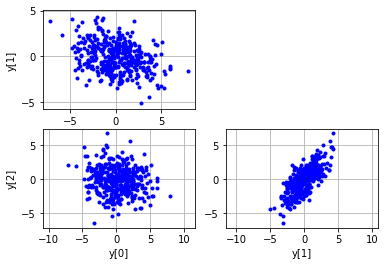

In [25]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
# y0 = age
# y1 = num diagnoses
# y2 = visit duration (minutes)
r = np.array([
        [  5.50, -2.75, -2.00],
        [ -2.75,  2.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])


r = np.array([
        [  6.00,  -0.75, -0.25],
        [ -0.75,  2.50,  2.50],
        [ -0.25,  2.50,  4.00]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

In [33]:
# y0 = age
# y1 = num diagnoses
# y3 = visit duration (minutes)

ages_1 = y[0] + 50
num_dx_1 = y[1] + abs(y[1].min())
visit_minutes = y[2] + 30

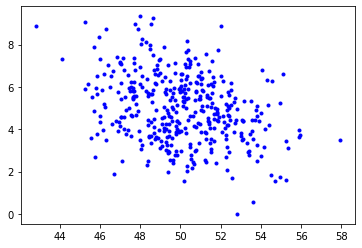

In [34]:
plot(ages_1, num_dx_1, 'b.')

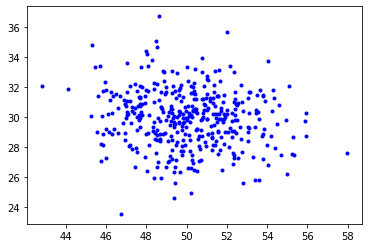

In [35]:
plot(ages_1, visit_minutes, 'b.')

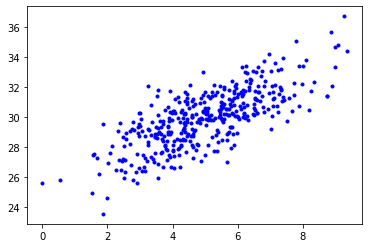

In [36]:
plot(num_dx_1, visit_minutes, 'b.')